In [1]:
# Do not modify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# inline plotting instead of popping out
%matplotlib inline

df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv',
    sep=',')
df.head()
# Do not modify
df = df.drop(['cbwd'], axis=1)  # drop non-scalar feature
df = df.dropna(axis=0, how='any')  # drop samples who has nan feature
df.head()
# Do not modify
idx = np.logical_or(
    np.logical_and(df['year'].values == 2014, df['month'].values < 3),
    np.logical_and(df['year'].values == 2013, df['month'].values == 12))
X = df.loc[idx].drop('pm2.5', axis=1)
y = df.loc[idx]['pm2.5'].values
X.head()
print(X.shape,y.shape)

(2130, 11) (2130,)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])

# Standardization

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# y_train_std = sc.fit_transform(y_train[:, np.newaxis]).flatten()
# y_test_std = sc.fit_transform(y_test[:, np.newaxis]).flatten()


#Training data points: 1491
#Testing data points: 639


In [3]:
def plot_resid(y_train_pred,y_train):
    plt.scatter(
        y_train_pred,
        y_train_pred - y_train,
        c='blue',
        marker='o',
        label='Training data')
    plt.scatter(
        y_test_pred,
        y_test_pred - y_test,
        c='lightgreen',
        marker='s',
        label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
    plt.xlim([-10, 50])
    plt.tight_layout()
    plt.show()

In [11]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.00007, n_iter=40, random_state=1,n_cell=20):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=n_cell)
        self.cost_ = []
        self.n_cell = n_cell
        
    def fit(self, X, y):
 
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)


[Quadratic]
#Features: 78
train sample discarded amount: 45 / 1491
train sample discarded amount: 29 / 639
MSE train: 3588.58, test: 3733.88
R^2 train: 0.72, test: 0.72


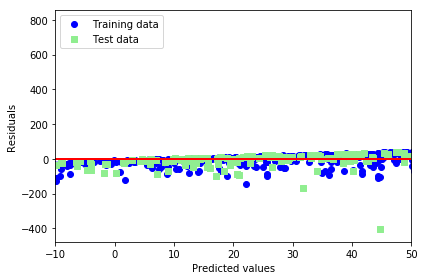

In [240]:
from sklearn.preprocessing import PolynomialFeatures
# regr = LinearRegressionGD()
# quadratic = PolynomialFeatures(degree=2)

# regr = LinearRegressionGD(n_iter=50,n_cell = X_train_std.shape[1]+1)
# print('[Linear]')
# print('#Features: %d' % X_train_std.shape[1])
# regr = regr.fit(X_train_std, y_train)
# y_train_pred = regr.predict(X_train_std)
# y_test_pred = regr.predict(X_test_std)
# print('MSE train: %.2f, test: %.2f' %
#       (mean_squared_error(y_train, y_train_pred),
#        mean_squared_error(y_test, y_test_pred)))
# print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
#                                        r2_score(y_test, y_test_pred)))
# plot_resid(y_train_pred,y_train)



print('\n[Quadratic]')
X_quad_train = quadratic.fit_transform(X_train_std)
X_quad_test = quadratic.fit_transform(X_test_std)

print('#Features: %d' % X_quad_train.shape[1])

regr = LinearRegressionGD(eta = 0.0000012,n_iter = 5000,n_cell = X_quad_train.shape[1]+1)
regr = regr.fit(X_quad_train, y_train)
y_train_pred = regr.predict(X_quad_train)
y_test_pred = regr.predict(X_quad_test)
# print(np.where((abs(y_train_pred-y_train))>10))
z = np.where((abs(y_train_pred-y_train))<160)
z2 = np.where((abs(y_test-y_test_pred))<160)
print('train sample discarded amount:',len(y_train) - len(y_train[z]),'/',len(y_train))
print('train sample discarded amount:',len(y_test) - len(y_test[z2]),'/',len(y_test))

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train[z], y_train_pred[z]),
       mean_squared_error(y_test[z2], y_test_pred[z2])))


print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train[z], y_train_pred[z]),
                                       r2_score(y_test[z2], y_test_pred[z2])))
plot_resid(y_train_pred,y_train)



[Cubic]
#Features: 364
train sample discarded amount: 70 / 1491
train sample discarded amount: 42 / 639
MSE train: 3599.85, test: 4334.12
R^2 train: 0.71, test: 0.66


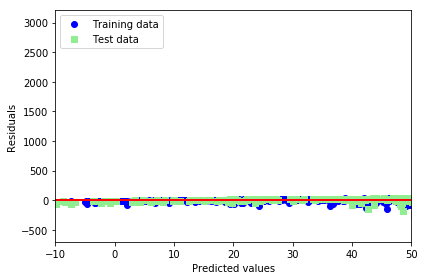

In [217]:


cubic = PolynomialFeatures(degree=3)

print('\n[Cubic]')
X_cubic_train = cubic.fit_transform(X_train_std)
X_cubic_test = cubic.fit_transform(X_test_std)
# regr = LinearRegressionGD(eta = 0.000000001,n_iter = 5000,n_cell = X_cubic_train.shape[1]+1)

print('#Features: %d' % X_cubic_train.shape[1])
regr = regr.fit(X_cubic_train, y_train)
y_train_pred = regr.predict(X_cubic_train)
y_test_pred = regr.predict(X_cubic_test)

z = np.where((abs(y_train_pred-y_train))<160)
z2 = np.where((abs(y_test-y_test_pred))<160)
print('train sample discarded amount:',len(y_train) - len(y_train[z]),'/',len(y_train))
print('train sample discarded amount:',len(y_test) - len(y_test[z2]),'/',len(y_test))

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train[z], y_train_pred[z]),
       mean_squared_error(y_test[z2], y_test_pred[z2])))


print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train[z], y_train_pred[z]),
                                       r2_score(y_test[z2], y_test_pred[z2])))

plot_resid(y_train_pred,y_train)


[quad]
#Features: 1365
train sample discarded amount: 447 / 1491
train sample discarded amount: 197 / 639
MSE train: 5933.65, test: 5233.86
R^2 train: -1.78, test: -1.76


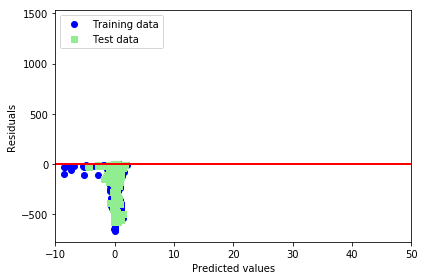

In [250]:
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures(degree=4)

print('\n[quad]')
X_quad_train = quad.fit_transform(X_train_std)
X_quad_test = quad.fit_transform(X_test_std)
# regr = LinearRegressionGD(eta = 1e-15,n_iter = 5000,n_cell = X_quad_train.shape[1]+1)

print('#Features: %d' % X_quad_train.shape[1])
regr = regr.fit(X_quad_train, y_train)
y_train_pred = regr.predict(X_quad_train)
y_test_pred = regr.predict(X_quad_test)

z = np.where((abs(y_train_pred-y_train))<160)
z2 = np.where((abs(y_test-y_test_pred))<160)
print('train sample discarded amount:',len(y_train) - len(y_train[z]),'/',len(y_train))
print('train sample discarded amount:',len(y_test) - len(y_test[z2]),'/',len(y_test))

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train[z], y_train_pred[z]),
       mean_squared_error(y_test[z2], y_test_pred[z2])))


print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train[z], y_train_pred[z]),
                                       r2_score(y_test[z2], y_test_pred[z2])))

plot_resid(y_train_pred,y_train)

In [47]:
# print(y_test,y_test_pred)
print(quad.)

<bound method BaseEstimator.get_params of PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)>


MSE train: 201.72, test: 1485.69
R^2 train: 0.99, test: 0.90


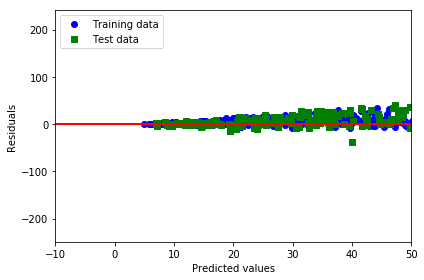

In [9]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(
    n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

# Residual plot
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred, y_test_pred - y_test, c='green', marker='s', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()
